# Seção 04.02 -  Aprendizagem Bayesiana (Análise de crédito)
Para esta seção, usarei a base de dados "credit_data.csv" disponibilizada no curso do Professor Jones na UDEMY.

In [1]:
# Instruções basiconas de sempre.

# Lidar com dataframes.
import numpy as np
import pandas as pd

# Lidar com gráficos.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from plotting import (multiple_histograms_plot,
                      bar_plot_with_categorical,
                      plot_confusion_matrix,
                      plot_confusion_matrix_2,
                      plot_roc)

# Lidar com preparação de dados.
from data_prep import data_prep as dp # Eu que fiz esse modulinho ("uuuuuuuuuma bosts!").
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Lidar com validação de modelos.
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

In [2]:
nomeDaBase = "../bases/credit-data.csv"
df = pd.read_csv(nomeDaBase, sep=",", encoding="utf-8", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1 to 2000
Data columns (total 4 columns):
income     2000 non-null float64
age        1997 non-null float64
loan       2000 non-null float64
default    2000 non-null int64
dtypes: float64(3), int64(1)
memory usage: 78.1 KB


In [4]:
df.head(10)

,income,age,loan,default
clientid,,,,
1,66155.925095,59.017015,8106.532131,0
2,34415.153966,48.117153,6564.745018,0
3,57317.170063,63.108049,8020.953296,0
4,42709.534201,45.751972,6103.642260,0
5,66952.688845,18.584336,8770.099235,1
6,24904.064140,57.471607,15.498598,0
7,48430.359613,26.809132,5722.581981,0
8,24500.141984,32.897548,2971.003310,1
9,40654.892537,55.496853,4755.825280,0


## 1) Análise preliminar dos dados:
Como é possível observar, no datast acima não há dados categóricos, somente numéricos. Neste caso, uma estratégia satisfatória para preparar esse dataset para o modelo de aprendizagem Bayesiana é:

1) Substituir os valores nulos (removendo a linha, ou substituindo os nulos por sua média ou mediana);

2) Normatizar para que amplitudes e escalas muito diferentes não enviesem o modelo.

In [5]:
# Vimos que há valores nulos somente no atributo 'age'.

# imputer = SimpleImputer(missing_values = 'NaN', strategy = 'mean')
# imputer.fit_transform(df.iloc[:,:])

In [6]:
df.dropna(axis=0,how="any", inplace=True);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 1 to 2000
Data columns (total 4 columns):
income     1997 non-null float64
age        1997 non-null float64
loan       1997 non-null float64
default    1997 non-null int64
dtypes: float64(3), int64(1)
memory usage: 78.0 KB


Por fim, temos o dataframe pronto para aplicar o modelo:

In [8]:
df.head(10)

,income,age,loan,default
clientid,,,,
1,66155.925095,59.017015,8106.532131,0
2,34415.153966,48.117153,6564.745018,0
3,57317.170063,63.108049,8020.953296,0
4,42709.534201,45.751972,6103.642260,0
5,66952.688845,18.584336,8770.099235,1
6,24904.064140,57.471607,15.498598,0
7,48430.359613,26.809132,5722.581981,0
8,24500.141984,32.897548,2971.003310,1
9,40654.892537,55.496853,4755.825280,0


## 2) Separação do dataset em treino, validação e teste.
Como temos somente um dataset, vamos separá-lo primeiramente em três partes:

    1- Treino;
    2- Validação; e
    3- Teste.
    
Porém, vamos usar o método *sklearn.model_selection.train_test_split* 2 vezes para obtermos essa separação.

In [9]:
x = df.iloc[:,0:3]

scaler = StandardScaler()
x = scaler.fit_transform(x)

y = df.iloc[:,3]

In [10]:
x

array([[ 1.45389775,  1.33686061,  1.20190707],
       [-0.76239757,  0.53663921,  0.69574418],
       [ 0.8367328 ,  1.63720692,  1.17381186],
       ...,
       [-0.07139   , -0.93901609,  0.35367319],
       [-0.11017022,  1.7006195 , -0.92670314],
       [ 1.68296904,  1.12656872,  0.96300639]])

## 3) Aplicando o modelo de aprendizagem Bayesiana

In [11]:
from sklearn.naive_bayes import GaussianNB

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classificador = GaussianNB()
classificador.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
y_pred = classificador.predict_proba(x_test)

In [31]:
y_pred

array([[9.81465739e-01, 1.85342613e-02],
       [9.94706042e-01, 5.29395784e-03],
       [6.97850702e-01, 3.02149298e-01],
       [9.99999932e-01, 6.76957153e-08],
       [9.99999962e-01, 3.75719569e-08],
       [7.53208318e-01, 2.46791682e-01],
       [9.99817374e-01, 1.82625649e-04],
       [9.48372170e-01, 5.16278301e-02],
       [8.02205304e-01, 1.97794696e-01],
       [8.39139224e-01, 1.60860776e-01],
       [9.52003900e-01, 4.79960998e-02],
       [9.52506095e-01, 4.74939049e-02],
       [9.33387974e-01, 6.66120261e-02],
       [1.42713332e-01, 8.57286668e-01],
       [9.99999999e-01, 7.57385152e-10],
       [1.00000000e+00, 3.65878538e-12],
       [4.45349661e-01, 5.54650339e-01],
       [6.07368188e-01, 3.92631812e-01],
       [9.48340930e-02, 9.05165907e-01],
       [9.74365486e-01, 2.56345143e-02],
       [9.97965427e-01, 2.03457293e-03],
       [9.99989202e-01, 1.07984509e-05],
       [6.90266979e-01, 3.09733021e-01],
       [9.99999999e-01, 5.96794822e-10],
       [9.586047

### Verificando o como o modelo se saiu

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Métrica 1 (Acurácia): {:.6}.".format(
    accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)))
print("Métrica 2 (Relatório de classificação):\n{}.".format(
    classification_report(y_test, y_pred)))
print("Métrica 3 (Relatório de classificação):\n{}.".format(
    confusion_matrix(y_test, y_pred)))

Métrica 1 (Acurácia): 0.905.
Métrica 2 (Relatório de classificação):
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       339
           1       0.78      0.52      0.63        61

   micro avg       0.91      0.91      0.91       400
   macro avg       0.85      0.75      0.79       400
weighted avg       0.90      0.91      0.90       400
.
Métrica 3 (Relatório de classificação):
[[330   9]
 [ 29  32]].


Normalized confusion matrix
[[0.97345133 0.02654867]
 [0.47540984 0.52459016]]


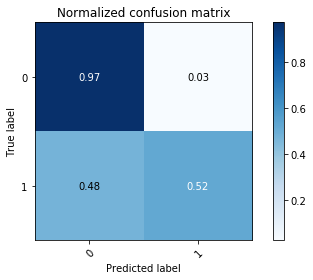

In [28]:
plot_confusion_matrix_2(y_test, y_pred, normalize=True);

### Agora, usando validação cruzada.

In [ ]:
classificador = GaussianNB()
classificador.fit(x, y)

resultados = cross_val_score(classificador, x, y, cv = 10)
print("Acurácia média: {:.3} ± {:.3}.".format(resultados.mean(), resultados.std()))

### Agora, usando validação cruzada estritificada.

In [ ]:
# kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
# resultados = []
# matrizes = []

# for indice_treinamento, indice_teste in kfold.split(x, np.zeros(shape=(x.shape[0], 1))):
#     #print('Índice treinamento: ', indice_treinamento, 'Índice teste: ', indice_teste)
#     classificador = GaussianNB()
#     classificador.fit(x[indice_treinamento], y[indice_treinamento]) 
#     y_pred = classificador.predict(x[indice_teste])
#     precisao = accuracy_score(y[indice_teste], y_pred)
#     matrizes.append(confusion_matrix(y[indice_teste], y_pred))
#     resultados.append(precisao)

# matriz_final = np.mean(matrizes, axis = 0)
# resultados = np.asarray(resultados)
# resultados.mean()
# resultados.std()

In [ ]:
resultados = StratifiedKFold(classificador, x, y, cv = 10)
print("Acurácia média: {:.3} ± {:.3}.".format(resultados.mean(), resultados.std()))